In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from PIL import Image,ImageOps,ImageDraw
from math import sin,cos,pi
import imgaug.augmenters as iaa

In [2]:
df_names_m = pd.read_csv("Names_Surnames/names_male.csv")
df_names_f = pd.read_csv("Names_Surnames/names_female.csv")

[]

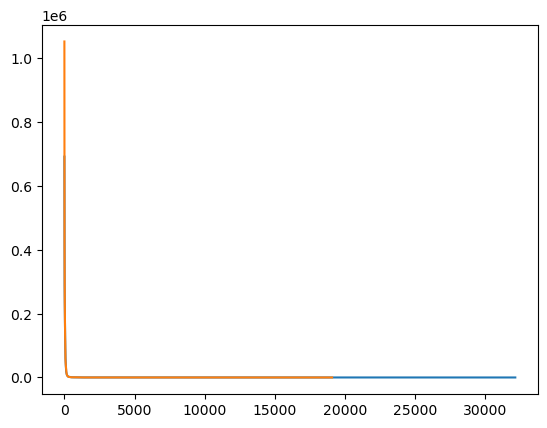

In [3]:
plt.plot(df_names_m["LICZBA WYSTĄPIEŃ"])
plt.plot(df_names_f["LICZBA_WYSTĄPIEŃ"])
plt.plot()

[]

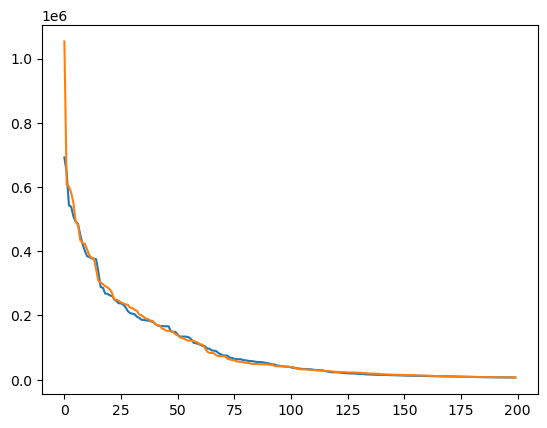

In [4]:
plt.plot(df_names_m["LICZBA WYSTĄPIEŃ"].iloc[:200])
plt.plot(df_names_f["LICZBA_WYSTĄPIEŃ"].iloc[:200])
plt.plot()

In [5]:
df_surname_m = pd.read_csv("Names_Surnames/surnames_male.csv")
df_surname_f = pd.read_csv("Names_Surnames/surnames_female.csv")

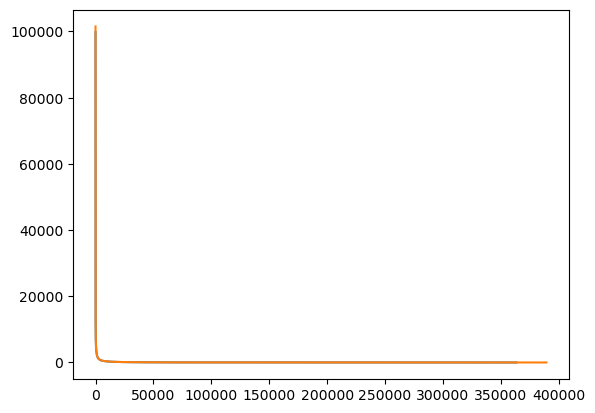

In [6]:
plt.plot(df_surname_m["Liczba"])
plt.plot(df_surname_f["Liczba"])

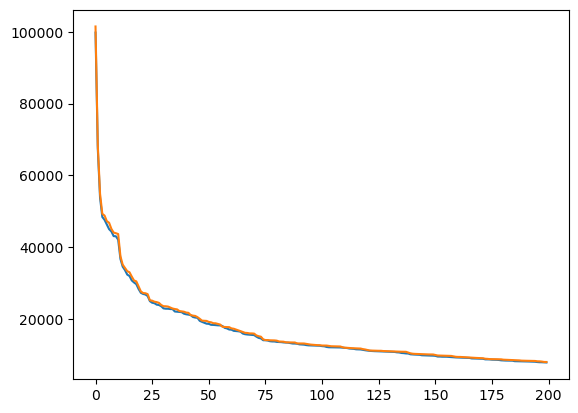

In [7]:
plt.plot(df_surname_m["Liczba"].iloc[:200])
plt.plot(df_surname_f["Liczba"].iloc[:200])

In [8]:
df_surname_m = df_surname_m.iloc[:200]
df_surname_f = df_surname_f.iloc[:200]
df_names_m = df_names_m.iloc[:200]
df_names_f = df_names_f.iloc[:200]

In [9]:
def get_full_name():
    gender = random.randint(0,1)
    if gender == 0:
        return df_names_f.iloc[random.randint(0,199),0],df_surname_f.iloc[random.randint(0,199),0]
    else:
        return df_names_m.iloc[random.randint(0,199),0],df_surname_m.iloc[random.randint(0,199),0]

In [10]:
for i in range(10):
    name,surname = get_full_name()
    print(name,surname)

ADRIANA DĄBROWSKA
OLHA CHMIELEWSKA
ALEKSANDER KĘDZIERSKI
TOBIASZ RYBAK
DAMIAN SOWA
ANTONI MILEWSKI
KALINA STEFAŃSKA
ERYK SZYMCZAK
MAJA MUCHA
ANTONINA SIKORSKA


Data source: https://cs.pollub.pl/phcd/

In [12]:
pol_letters = {"pol_a":"ą","pol_c":"ć","pol_e":"ę","pol_l":"ł","pol_n":"ń","pol_o":"ó","pol_s":"ś","pol_z1":"ź","pol_z2":"ż"}

In [21]:
upper_case = {}
for filename in os.listdir("Polish_handwriting/Upper_case"):
    key = filename
    if filename in pol_letters:
        key = pol_letters[filename]
    upper_case[key] = []
    print(key)
    for pic_file in os.listdir("Polish_handwriting/Upper_case/" + filename):
        pic = cv2.imread("Polish_handwriting/Upper_case/" + filename + "/" + pic_file, cv2.IMREAD_GRAYSCALE)
        upper_case[key].append(pic)

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
ą
ć
ę
ł
ń
ó
ś
ź
ż
q
r
s
t
u
v
w
x
y
z


In [22]:
lower_case = {}
for filename in os.listdir("Polish_handwriting/Lower_case"):
    key = filename
    if filename in pol_letters:
        key = pol_letters[filename]
    lower_case[key] = []
    print(key)
    for pic_file in os.listdir("Polish_handwriting/Lower_case/" + filename):
        pic = cv2.imread("Polish_handwriting/Lower_case/" + filename + "/" + pic_file, cv2.IMREAD_GRAYSCALE)
        lower_case[key].append(pic)



a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
ą
ć
ę
ł
ń
ó
ś
ź
ż
q
r
s
t
u
v
w
x
y
z


In [368]:
def draw_boxes(img, boxes):
    height = np.array(img).shape[0]
    for box in boxes:
        #print(box[1])
#         points = np.array(((box[0],height-box[1][1]),(box[1][2],height-box[1][1]),
#                            (box[1][2],height-box[1][3]),(box[1][2],height-box[1][3]),(box[1][0],height-box[1][3])))
        points = np.array(box)
        img = cv2.polylines(np.array(img), [points], isClosed=True, color=(0,0,0), thickness=1)
        
        #print(points)
    plt.figure(figsize=(100,100))
    plt.imshow(img,cmap='gray')

In [372]:
def string_to_img():
    
    words = get_full_name()
    img = []
    box = []
    current = 0
    #print(words)
    max_height = 32*4
    for word in words:
        y1 = int((max_height-32)/2)
        y2 = int((max_height-32)/2) +32
        x1= 32+current
        x2= x1 + len(word)*32
        box.append([[x1,y1],[x2,y1],[x2,y2],[x1,y2]])
        current += x2
        first_letter = True
        word = word.lower()
        img.append(np.ones((32,32))*255)
        for char in word:
            
            if first_letter:
                index = random.randint(0, len(upper_case[char])-1)
                img.append(upper_case[char][index])
                first_letter = False
            else:
                index = random.randint(0, len(lower_case[char])-1)
                img.append(lower_case[char][index])
    size = len(img)
    total_width = (size+1)*32
     
    
    merged_image = Image.new('L', (total_width, max_height),( 255))

    for j in range(size):
            merged_image.paste(Image.fromarray(img[j]),(j*32,int((max_height-32)/2)))
    return merged_image,box,words

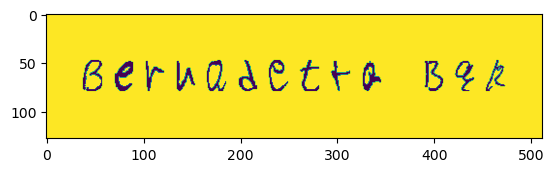

In [303]:
canvas,box = string_to_img()
plt.imshow(canvas)
plt.show()

In [373]:
canvas,box,text = string_to_img()

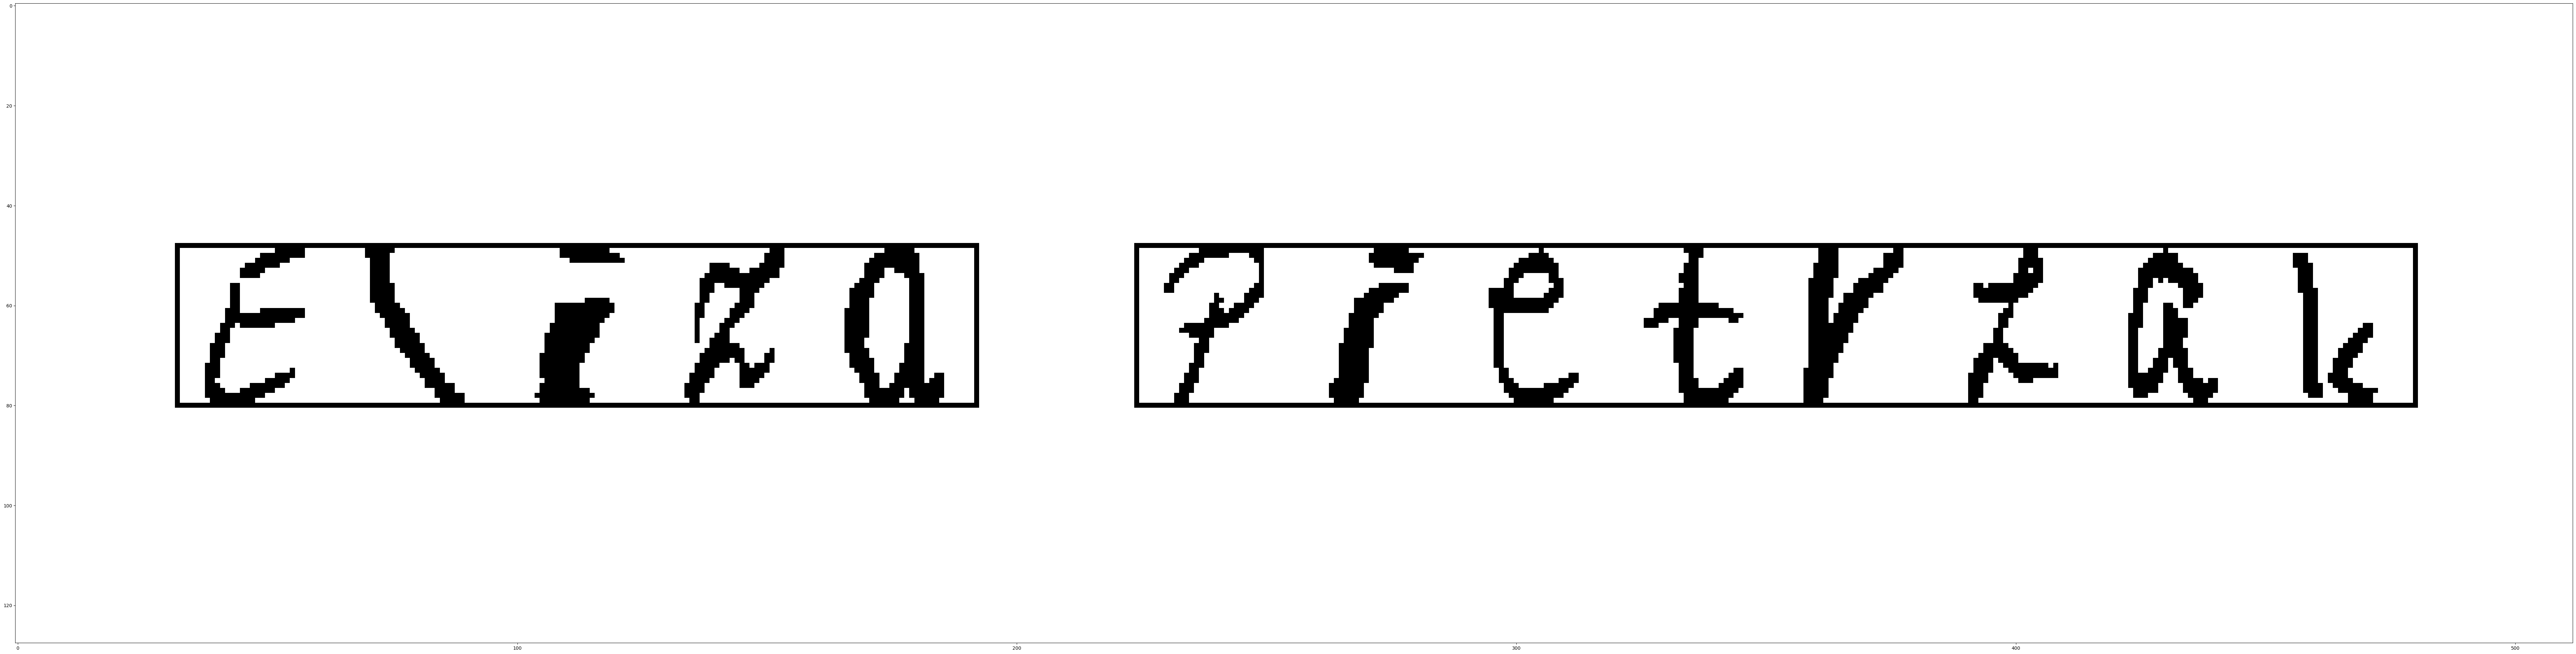

In [287]:
draw_boxes(canvas,box)

In [282]:
def vector_cenralisation(boxes,shape):
    x_center = int(shape[1]/2)
    y_center = int(shape[0]/2)
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] =  boxes[i][j][0] - x_center
            boxes[i][j][1] =  y_center -  boxes[i][j][1] 
    return boxes

In [339]:
def vector_rotation(boxes,angle):
    angle = angle/180 *pi
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] = cos(angle)*boxes[i][j][0] - sin(angle)*boxes[i][j][1]
            boxes[i][j][1] = sin(angle)*boxes[i][j][0] + cos(angle)*boxes[i][j][1]
    return boxes

In [340]:
def vector_decenralisation(boxes,shape):
    x_center = int(shape[1]/2)
    y_center = int(shape[0]/2)
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] =  int(boxes[i][j][0] + x_center)
            boxes[i][j][1] =  int(y_center -  boxes[i][j][1])
    return boxes

In [390]:
def get_img_box():
    canvas,box,text = string_to_img()
    shape = np.array(canvas).shape
    angle = random.uniform(-15, 15)
    box = vector_cenralisation(box,shape)
    box = vector_rotation(box,angle)
    box = vector_decenralisation(box,shape)
    canvas = canvas.rotate(angle,fillcolor="white")
    return canvas,box,text
    

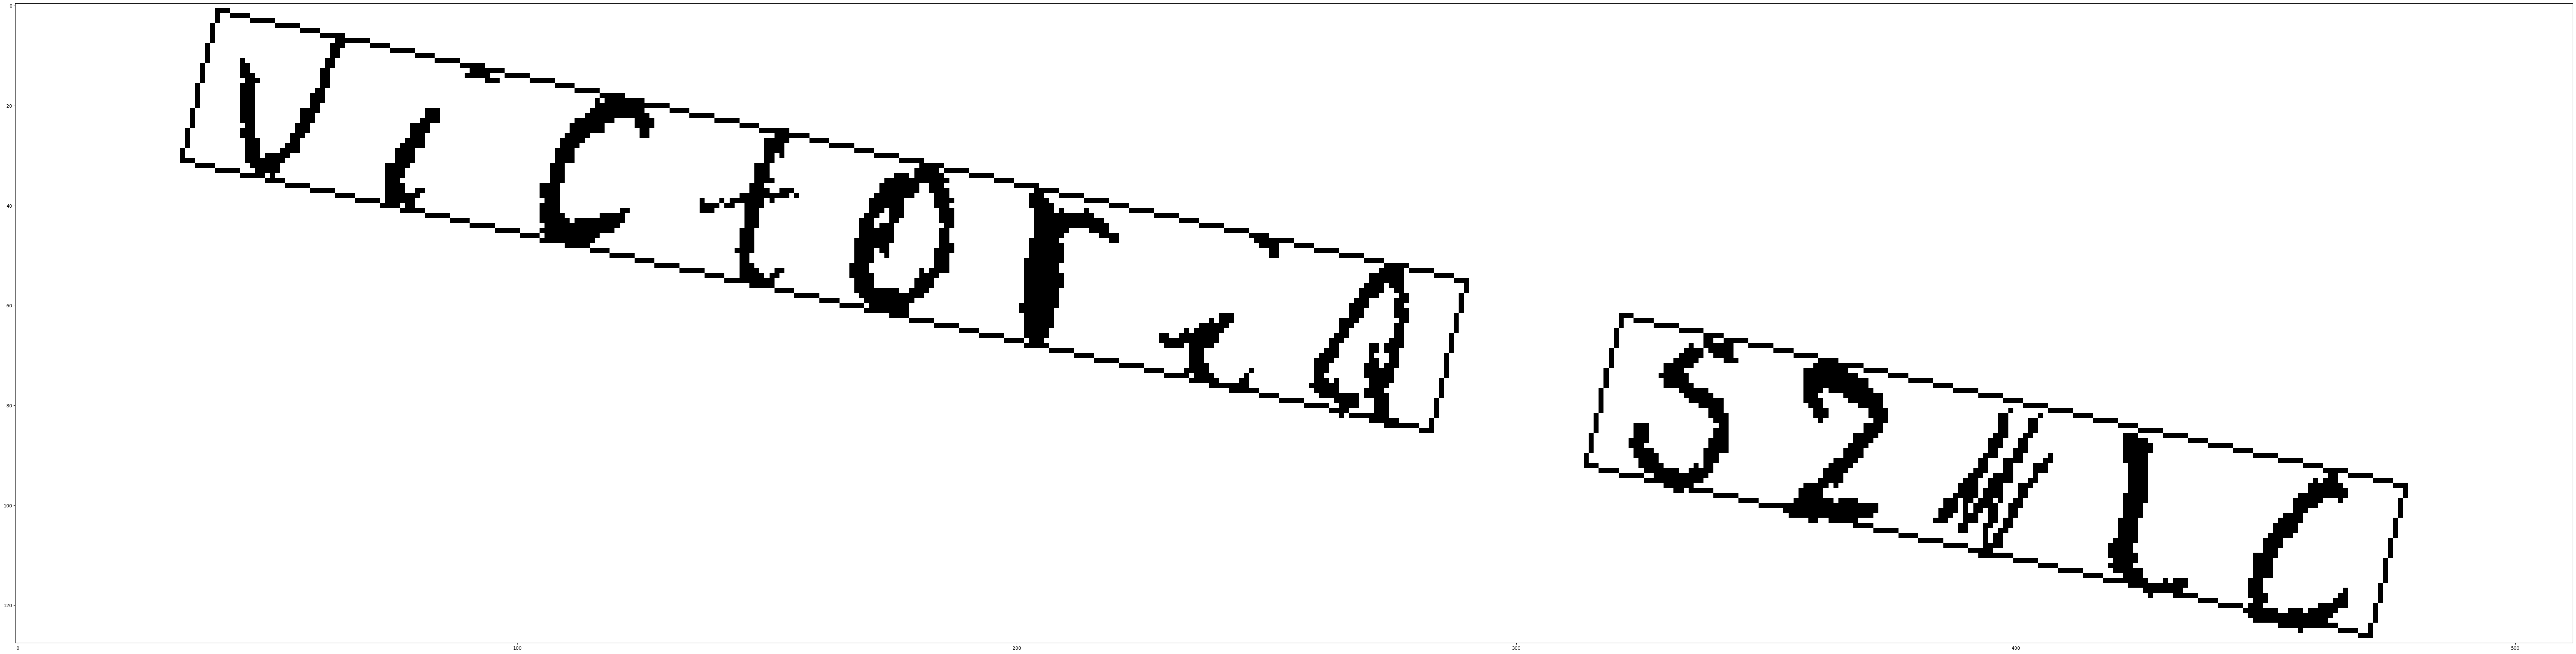

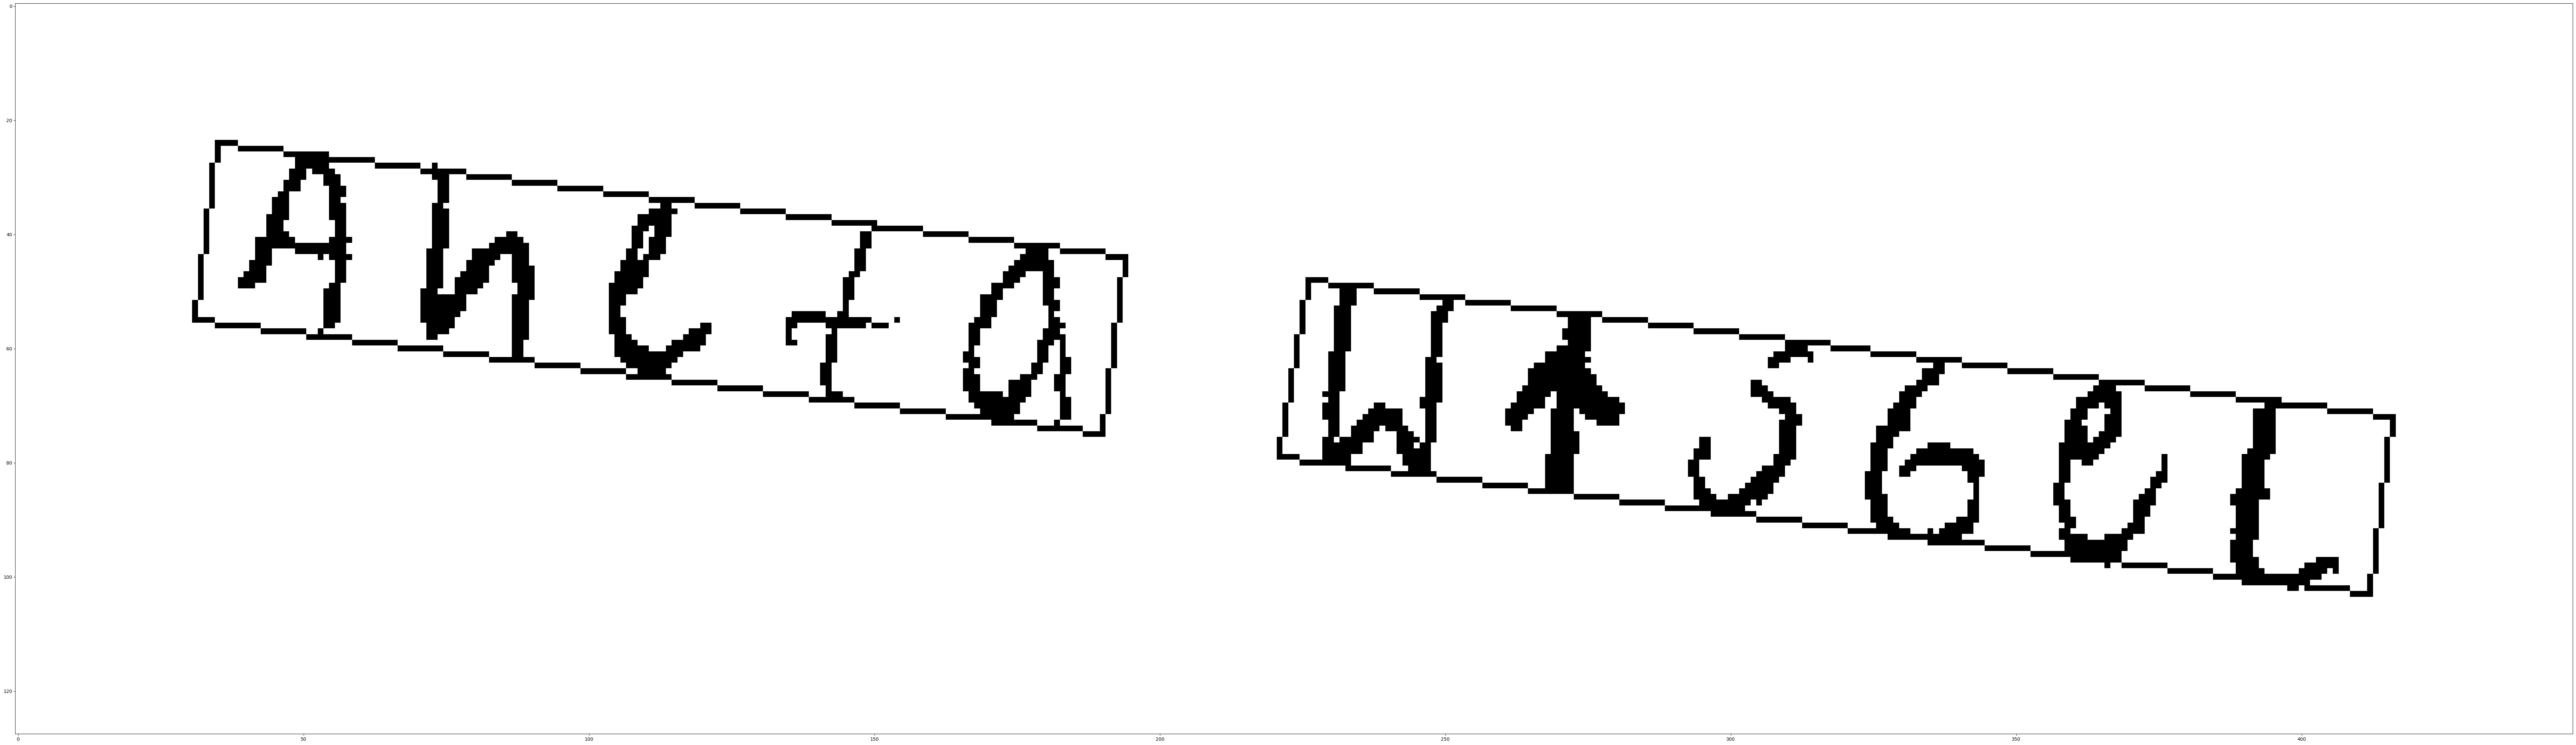

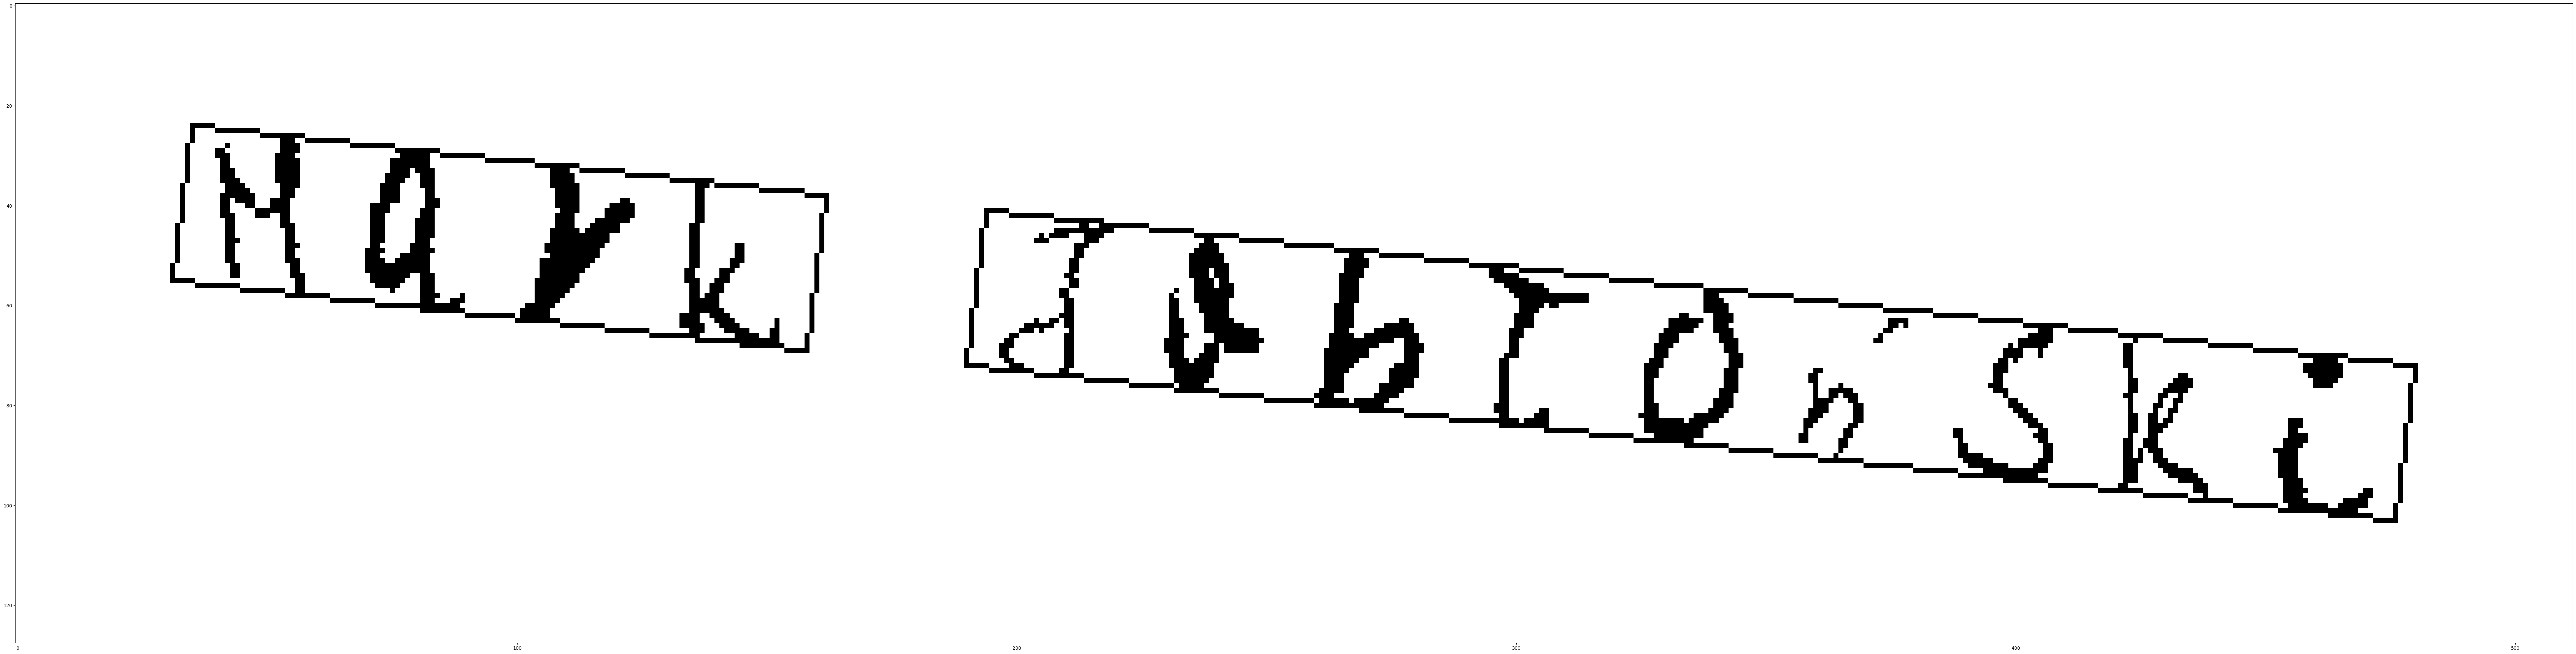

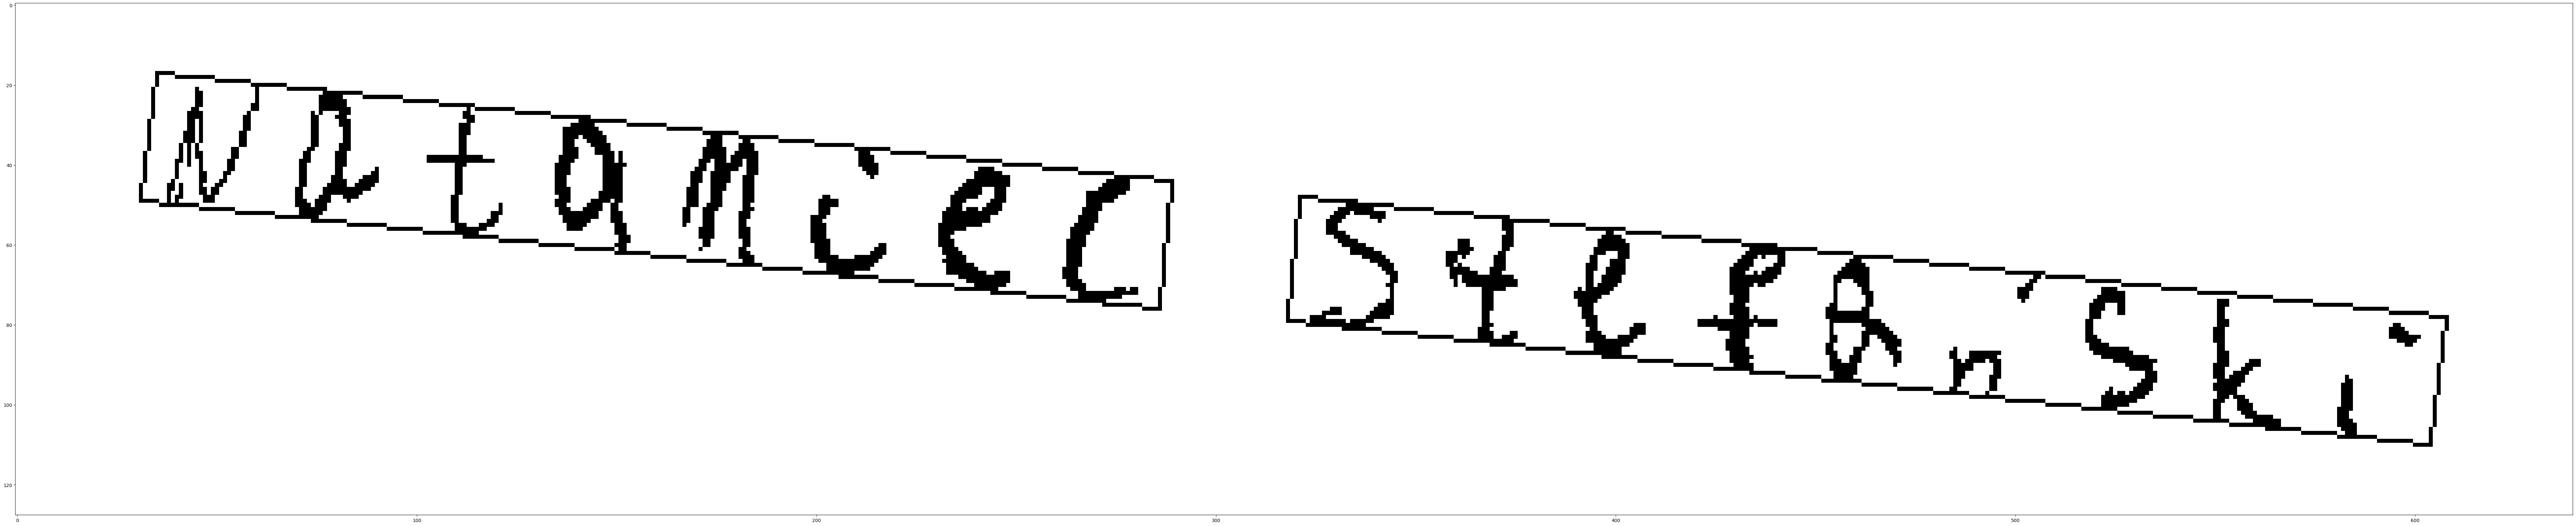

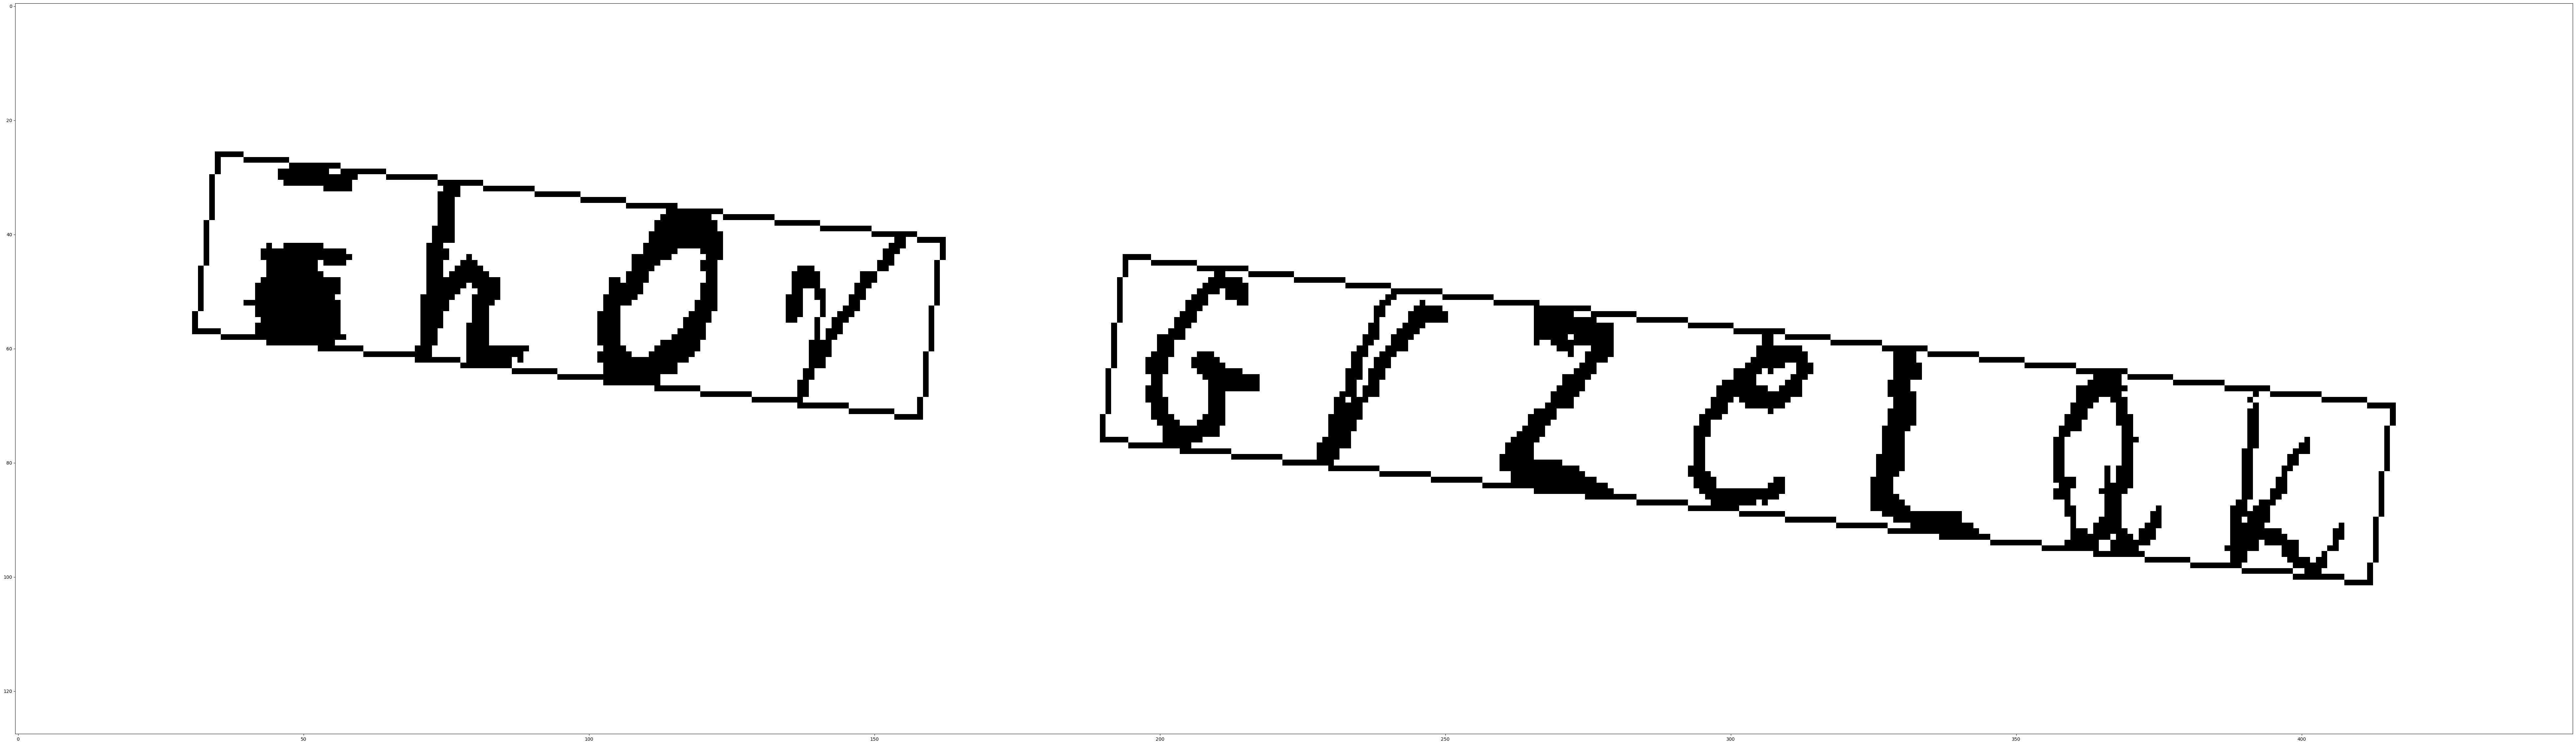

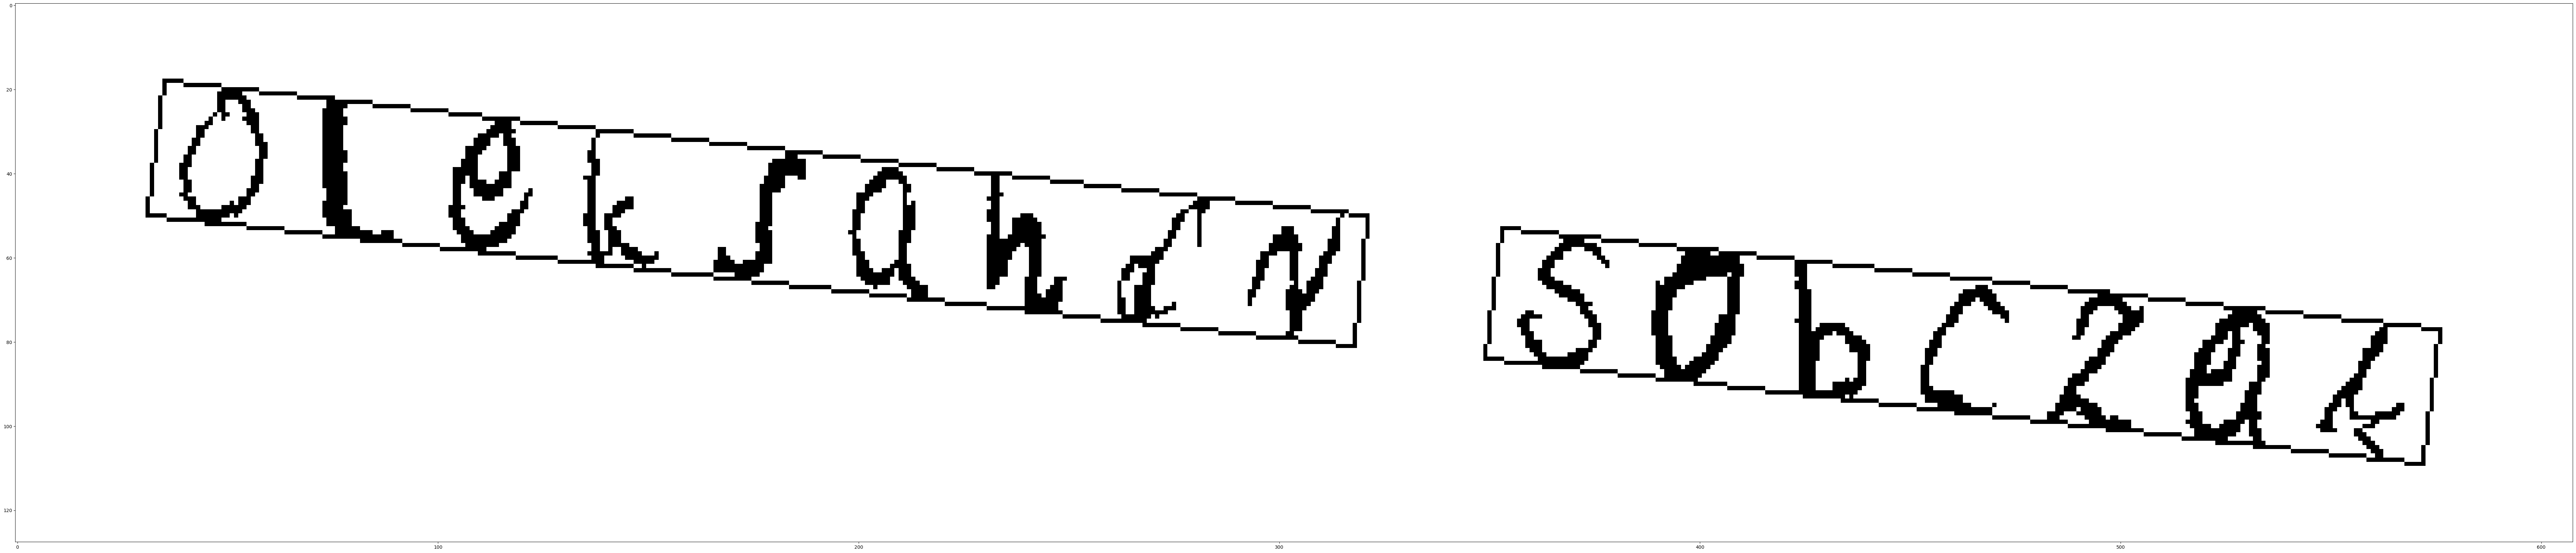

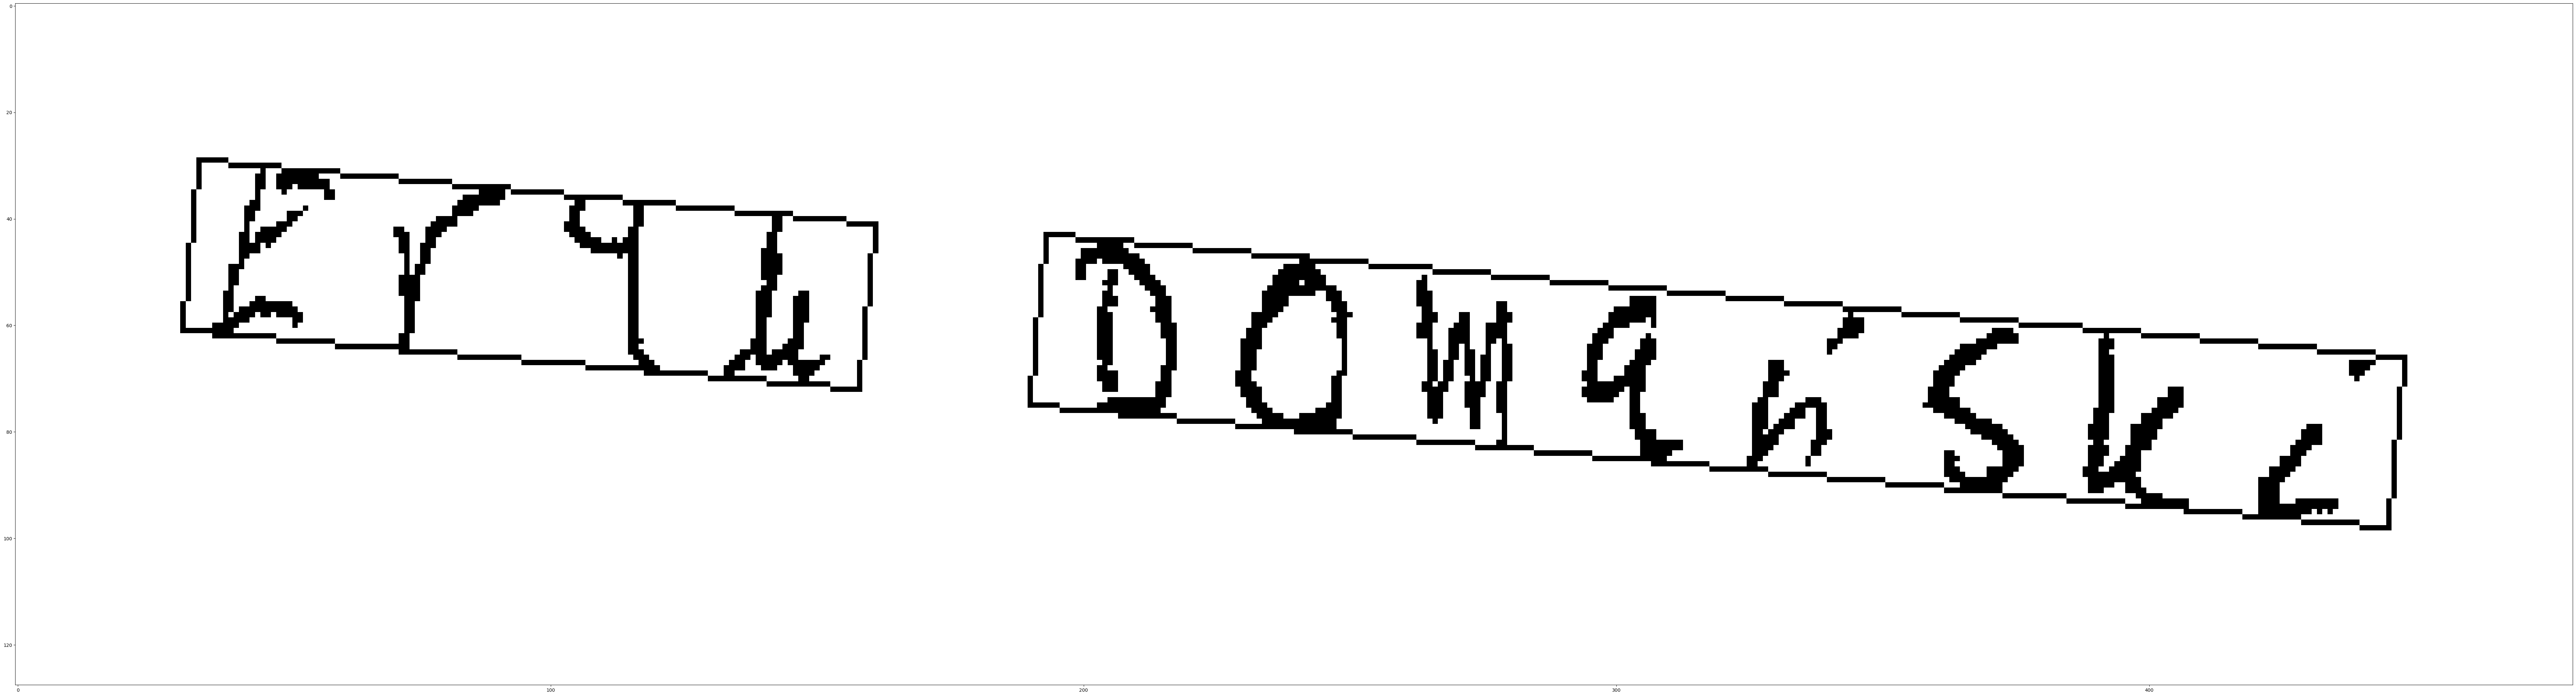

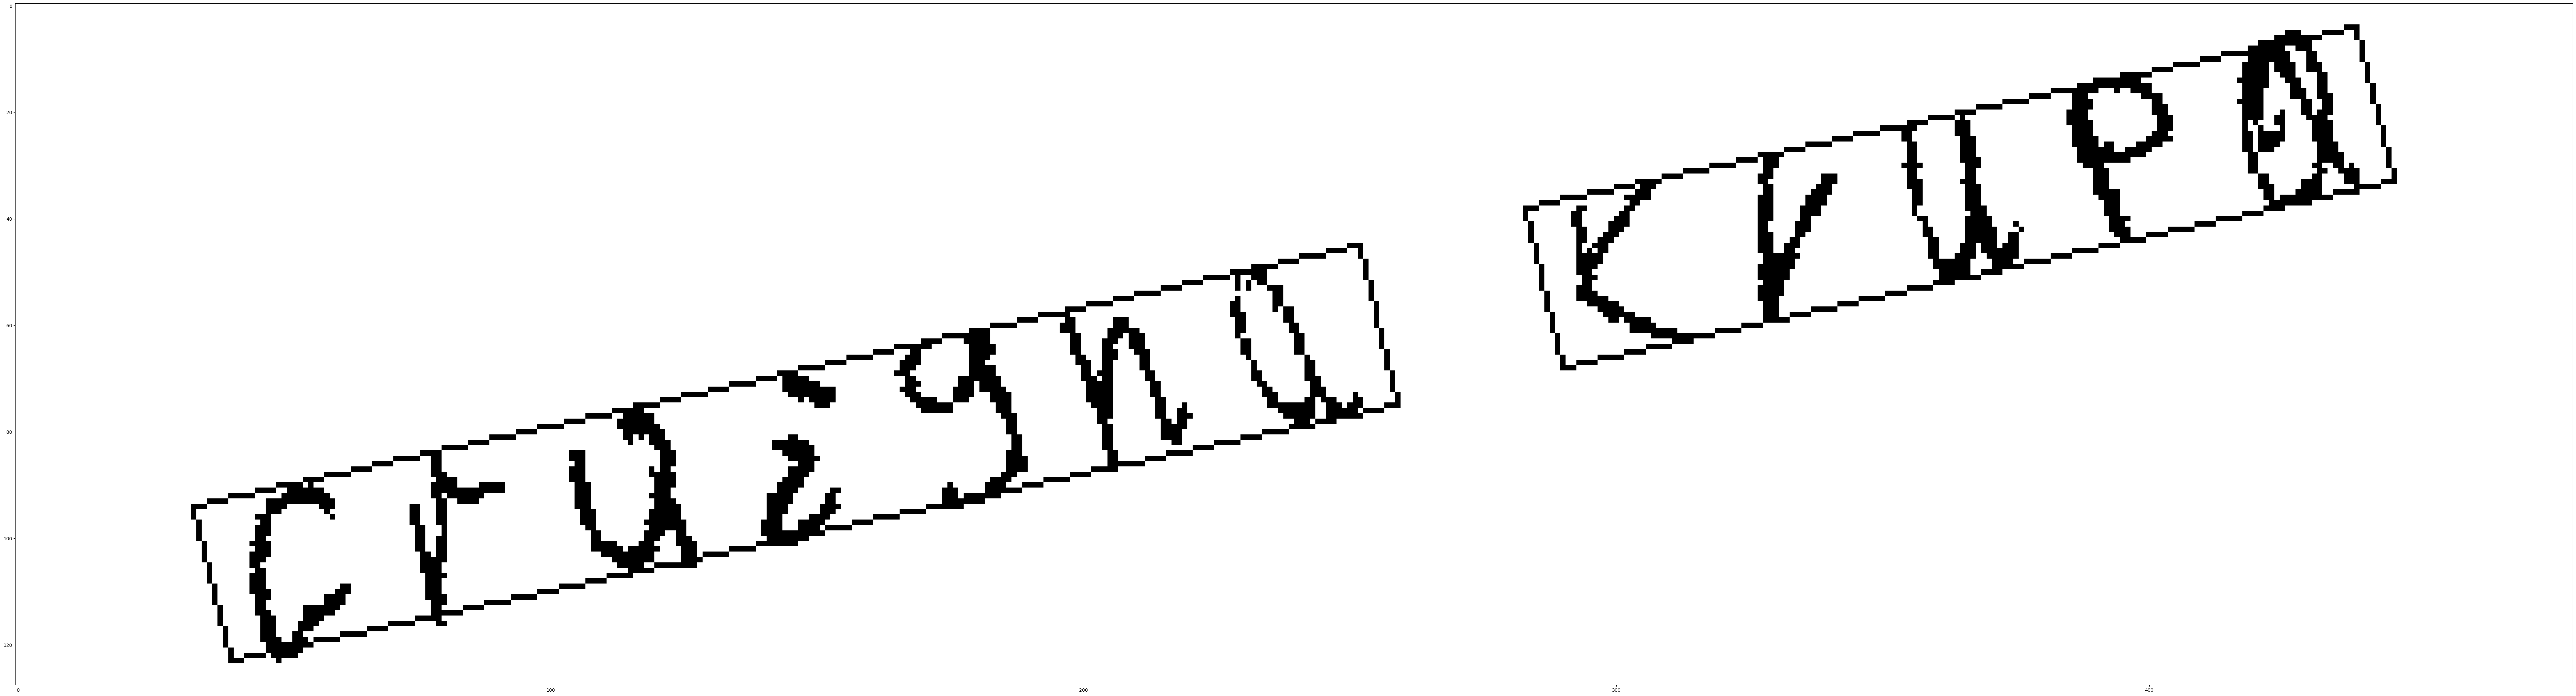

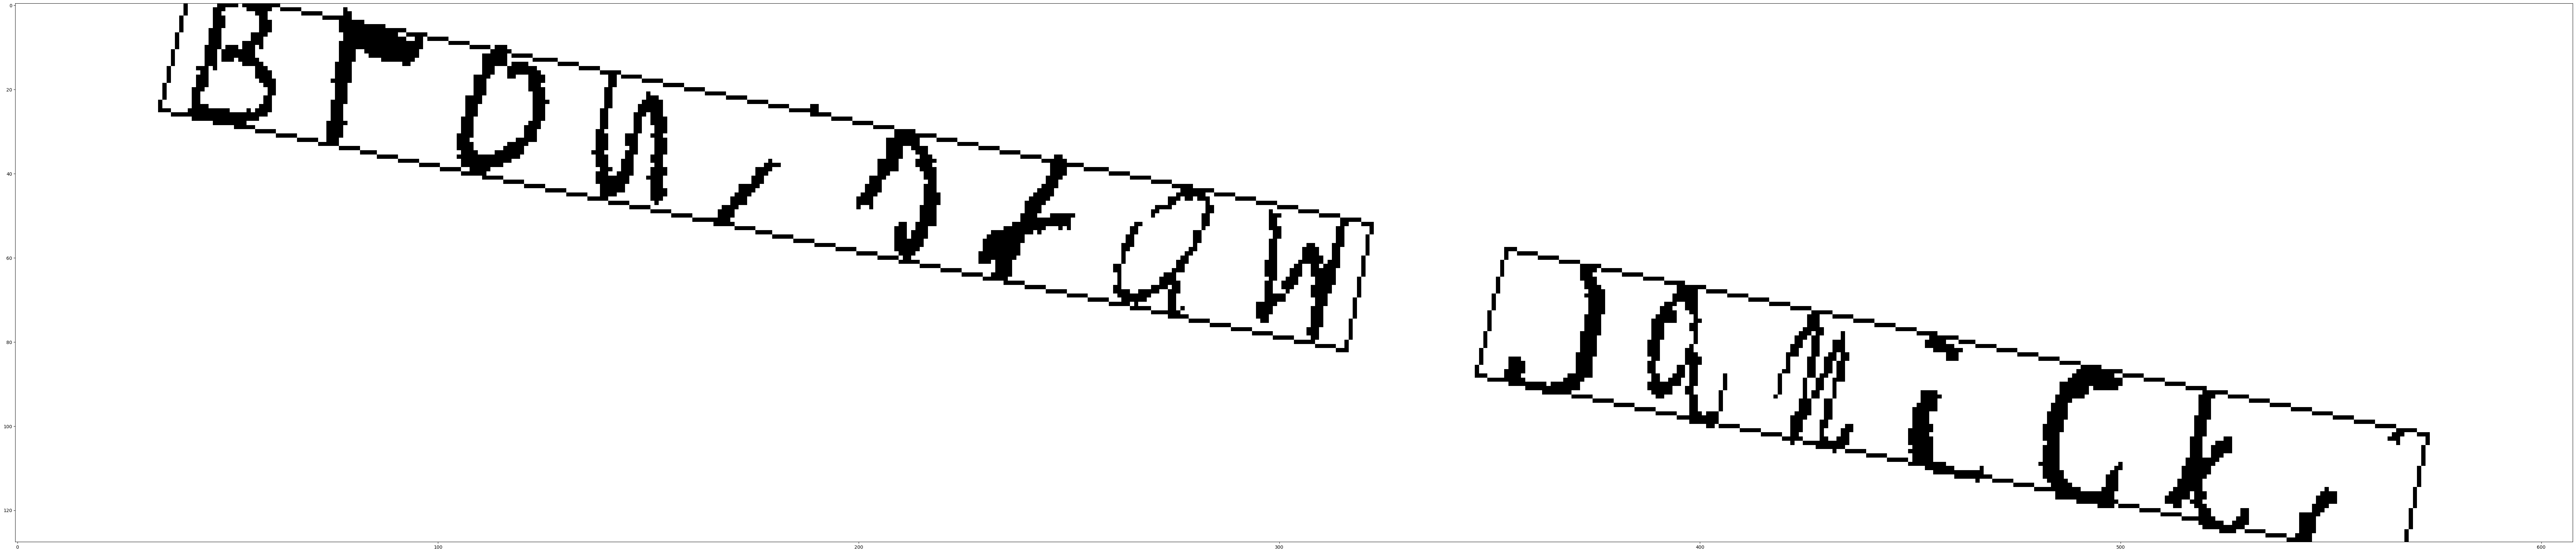

In [369]:
for i in range(10):
    try:
        canvas,box = get_img_box()
        draw_boxes(canvas,box)
    except:
        pass

In [400]:
train_size=20000
test_size = 5000
validation_size =5000

In [401]:
df_train = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
for i in range(train_size):
    try:
        canvas,box,text = get_img_box()
        img_path = f'Traning_data/img{i}.jpg'
        canvas.save(img_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1]]],columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
        df_train = pd.concat([df_train,new_row])       
    except:
        i-=1
df_train.to_csv("Traning_data/data.csv")

In [402]:
df_test = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
for i in range(test_size):
    try:
        canvas,box,text = get_img_box()
        img_path = f'Test_data/img{i}.jpg'
        canvas.save(img_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1]]],columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
        df_test = pd.concat([df_test,new_row])       
    except:
        i-=1
df_test.to_csv("Test_data/data.csv")

In [403]:
df_val = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
for i in range(validation_size):
    try:
        canvas,box,text = get_img_box()
        img_path = f'Validation_data/img{i}.jpg'
        canvas.save(img_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1]]],columns = ["Img_path","Name","Name_box","Surname","Surname_box"])
        df_val = pd.concat([df_val,new_row])       
    except:
        i-=1
df_val.to_csv("Validation_data/data.csv")